## RNN의 한계
RNN은 현재의 문제를 해결하는데 이전의 정보를 함께 고려한다. 하지만, 실제로도 그럴까? 사실 상황에 따라 다르다고 할 수 있다. 아래에 두가지 문장을 준비했다. 이 문장들 각각 뒤에 어떤 말이 이어질지 유추해보도록 하자.

1. 오늘은 하늘이 ___ .

2. 당신은 20명을 태운 버스를 운행하고 있습니다. 이번 정류장에서 5 명이 내렸고, 3명이 탔습니다. 다음 정류장에서는 7명이 내리고, 4명이 탔습니다. 그리고 그 다음 정류장에서는 1명이 내리고, 3명이 탔습니다. 그리고, 버스 기사의 나이는 __ 입니다.

1 번 문장의 경우, '오늘' 과 '하늘'만 기억 한다면, 빈 칸에 채울 단어로 '맑다', '흐리다' 등을 쉽게 떠올릴 수 있다. 하지만 2번 문장 같은 경우 빈칸을 예측하기 위해 필요한 정보는 문장의 가장 처음에 있다. '당신', '버스를 운행하고 있습니다.' 이 두 정보만 기억하고 있다면, 쉽게 빈 칸을 채울 수 있었다. 하지만 정보를 사용하는 지점과 해당 정보의 위치 간의 거리가 멀어서 아마 독자 중에서도 몇명은 이 빈칸을 못 채웠을지도 모른다. (참고로 버스 기사의 나이는 "당신"의 나이이다.)

1번 문장과 같이 현재 시점을 예측하는데 필요한 문맥이 가까이 있고 많지 않다면 RNN은 이를 학습할 수 있다. 하지만, **2번 문장 처럼 정보를 필요로 하는 시점과, 필요한 정보가 멀리 떨어져 있다면 RNN은 잘 예측할 수 없다. 이 문제를 "Long-term dependency"라고 한다**. 이 문제를 해결하기 위해 고안된 것이 LSTM이다.

## LSTM

Long Short Term Memory, 줄여서 LSTM은 멀리 떨어져 있는 정보 또한 활용하도록 학습할 수 있다. 다음 그림은 LSTM의 구조를 도식화한 것이다.

[그림] LSTM 모형 : https://datascienceschool.net/upfiles/adcc93edb31e4ad289fb198f2f8d1ae6.png

구조가 어려워 보일 수도 있겠다. LSTM의 연산은 다음처럼 여러 단계로 나누어져 있다.

1. 망각게이트
2. 입력게이트
3. Cell state 갱신
4. 현재 셀의 출력값 계산

하나하나씩 살펴보도록 하자.

### 망각게이트(forget gate)
망각게이트는  𝑡  시점에서의 입력값 (𝑥_𝑡) 과 이전  𝑡−1 시점에서의 출력값 (ℎ_𝑡−1) 을 입력받아 이전 셀의 정보를 망각할지 말지 결정한다. 망각게이트의 출력값을  𝑓_𝑡 라고 할 때 수식으로 전개하면 다음과 같다. 다음 식에서는  𝜎 는 시그모이드 함수를 의미하고,  𝑊_𝑓  와  𝑏_𝑓  망각게이트의 가중치와 바이어스를 의미한다.

$$f_t = \sigma(W_f[h_{t-1},x_t] + b_f)$$

그리고 이 값은 이 후에 cell state,  𝐶_𝑡−1 에 곱해진다. 시그모이드 함수를 거치기 때문에  𝑓_𝑡 는 0 ~ 1 사이의 값을 가진다. 이 값은 이전 cell state에 곱해지기 때문에 0에 다가갈수록 이전의 정보를 잊고 1에 다가갈수록 이전의 정보를 기억하도록 한다. 다르게 해석하면 현재의 정보가 중요하면 이전의 정보를 잊게 할 것이고 현재의 정보가 필요없다면 이전의 정보를 기억하도록 할 것이다.

[그림] LSTM 모형 : https://datascienceschool.net/upfiles/64b3dbd7e5e94646b74f331948a175bf.png

### 입력게이트

입력게이트는  𝑡  시점에서의 입력값 (𝑥_𝑡) 과 이전  𝑡−1 시점에서의 출력값 (ℎ_𝑡−1) 을 입력받고 현재의 정보를 다음 시점으로 전해질 cell state에 얼마나 반영할 지를 결정한다.  𝑖_𝑡 를 입력게이트의 출력값이라 했을 때 수식으로 정리하면 다음과 같다.

$$i_t = \sigma(W_i[h_{t-1},x_t] + b_i)$$

[그림] LSTM 모형 : https://datascienceschool.net/upfiles/4896a96694bd4ebbbd1c12c155e105bb.png


### cell state 갱신

입력값 (𝑥_𝑡) 과 이전  𝑡−1 시점에서의 출력값 (ℎ_𝑡−1) 을 입력받고 이번엔 하이퍼탄젠트 함수를 사용해  𝐶̃_𝑡 를 생성하고 입력게이트의 출력과 Hadamard 곱 (⊙) 을 한다. 그리고 이 값과 망각게이트의 출력을 이용해 cell state를 다음 수식과 같이 갱신한다.

\begin{eqnarray}
\tilde{C}_t &=& \tanh(W_C[h_{t-1}, x_t] + b_C) \\ 
C_t &=& C_{t-1} \odot f_t + i_t \odot \tilde{C}_t
\end{eqnarray}

[그림] LSTM 모형 : https://datascienceschool.net/upfiles/0cd61c6446464a589ec03565bd6f1812.png


### 현재 셀의 출력값 계산

현재 셀의 출력값 ℎ_𝑡은 다음 수식처럼 계산한다.

\begin{eqnarray}
o_t &=& \sigma(W_o [h_{t-1}. x_t] + b_0) \\
h_t &=& o_t \odot \tanh(C_t)
\end {eqnarray}

[그림] LSTM 모형 : https://datascienceschool.net/upfiles/b392641f47914bdbb340d3cc5b533394.png


LSTM은 4개의 가중치 셋을 가진다.

* 가중치

\begin{eqnarray}
W_f, \ b_f \\
W_i, \ b_i \\
W_C, \ b_C \\
W_o, \ b_o
\end{eqnarray}

그리고 하나의 LSTM 셀은 두 가지의 출력값을 가진다.

* 출력값

\begin{eqnarray}
h_t &=& o_t \odot \tanh(C_t)\\
C_t &=& f_t \odot C_{t-1} + i_t \odot \tilde C_t \\ 
\end{eqnarray}

## Keras를 사용한 LSTM 구현

LSTM을 이용해 시계열 예측을 구현하고 RNN, ARMA 모형과 비교한다. 사용하는 데이터는 "영국의 호흡기 질환으로 인한 사망자 수" 시계열 데이터이다.

In [10]:
import statsmodels.api as sm
import pandas as pd

data = sm.datasets.get_rdataset('deaths', "MASS")
df = data.data
df.tail()

,time,value
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781
71,1979.916667,1915


In [11]:
import numpy as np

#df.value = df.value.map(lambda x: (x - df.value.mean()) / np.std(df.value))
df.value

0     3035
1     2552
2     2704
3     2554
4     2014
      ... 
67    1354
68    1333
69    1492
70    1781
71    1915
Name: value, Length: 72, dtype: int64

In [12]:
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)
fm._rebuild()

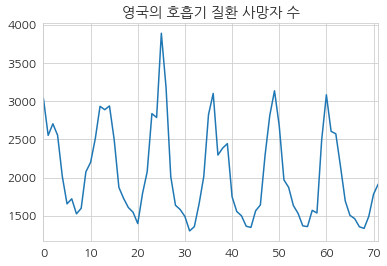

In [13]:
df.value.plot()
plt.title("영국의 호흡기 질환 사망자 수")
plt.show()

원 데이터는 방금 그래프와 같지만 모형간의 비교를 위해 데이터를 조작한다. 원데이터에서 2000 이상의 값들을 모두 2000으로 설정했다.

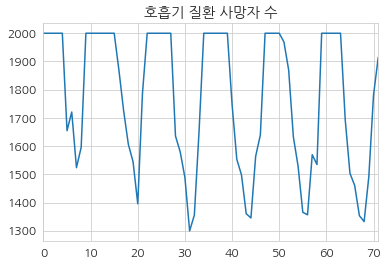

In [14]:
df["cliped_value"] = df.value.clip_upper(2000)
df.cliped_value.plot()
plt.title("호흡기 질환 사망자 수")
plt.show()

이 데이터를 이용해 ARMA 모형 만든다.  𝑝=1,𝑞=2

In [15]:
model_ARMA = sm.tsa.ARMA(df["cliped_value"], (1, 2)) # AR 1, MA 2
result_ARMA = model_ARMA.fit()
print(result_ARMA.summary())

                              ARMA Model Results                              
Dep. Variable:           cliped_value   No. Observations:                   72
Model:                     ARMA(1, 2)   Log Likelihood                -460.457
Method:                       css-mle   S.D. of innovations            143.769
Date:                Thu, 26 Sep 2019   AIC                            930.915
Time:                        23:06:32   BIC                            942.298
Sample:                             0   HQIC                           935.447
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1782.0340     64.334     27.700      0.000    1655.941    1908.126
ar.L1.cliped_value     0.5829      0.130      4.496      0.000       0.329       0.837
ma.L1.cliped_value  

이 모형으로 예측한 시계열과 실제 시계열을 비교한다.

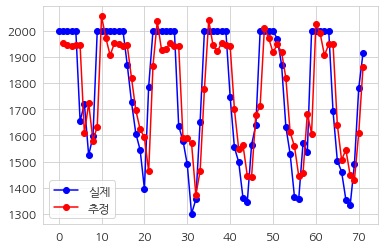

In [16]:
plt.plot(df["cliped_value"], "bo-", label="실제")
plt.plot(result_ARMA.predict(1), "ro-", label="추정")
plt.legend()
plt.show()

이번에는 RNN을 이용하여 시계열을 풀어본다. 이 때 타입 스텝은 7로 하였다. 신경망에서는 평균과 분산으로 정규화한 값을 데이터로 사용한다.

In [17]:
# 타입스텝
ts = 7

df["cliped_std_value"] = df.cliped_value.map(lambda x: (x - df.cliped_value.mean()) / np.std(df.cliped_value))
X_train = np.asarray([np.array([df.cliped_std_value.values[i+j] for j in range(ts)]) 
                      for i in range(len(df.cliped_std_value) - ts)]).reshape(-1, ts, 1)
y_train = df.cliped_std_value.values[ts:]
X_train.shape, y_train.shape

((65, 7, 1), (65,))

In [18]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model_RNN = Sequential()
model_RNN.add(SimpleRNN(100, input_shape=(ts, 1)))
model_RNN.add(Dense(1, activation='linear'))
model_RNN.compile(loss='mse', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model_RNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 100)               10200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


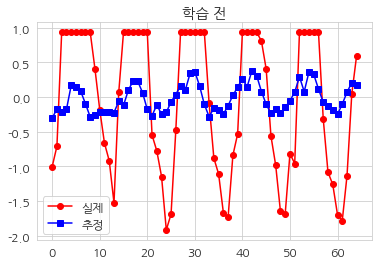

In [21]:
plt.plot(y_train[:], 'ro-', label='실제')
plt.plot(model_RNN.predict(X_train[:, :, :]), 'bs-', label="추정")
plt.legend()
plt.title("학습 전")
plt.show()

In [22]:
history_RNN = model_RNN.fit(X_train, y_train, epochs=1000, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
 - 0s - loss: 0.6641
Epoch 2/1000
 - 0s - loss: 0.5711
Epoch 3/1000
 - 0s - loss: 0.6224
Epoch 4/1000
 - 0s - loss: 0.4382
Epoch 5/1000
 - 0s - loss: 0.3691
Epoch 6/1000
 - 0s - loss: 0.3487
Epoch 7/1000
 - 0s - loss: 0.3461
Epoch 8/1000
 - 0s - loss: 0.3695
Epoch 9/1000
 - 0s - loss: 0.3753
Epoch 10/1000
 - 0s - loss: 0.4195
Epoch 11/1000
 - 0s - loss: 0.4158
Epoch 12/1000
 - 0s - loss: 0.3296
Epoch 13/1000
 - 0s - loss: 0.3355
Epoch 14/1000
 - 0s - loss: 0.3634
Epoch 15/1000
 - 0s - loss: 0.3298
Epoch 16/1000
 - 0s - loss: 0.3013
Epoch 17/1000
 - 0s - loss: 0.2973
Epoch 18/1000
 - 0s - loss: 0.3048
Epoch 19/1000
 - 0s - loss: 0.3341
Epoch 20/1000
 - 0s - loss: 0.3381
Epoch 21/1000
 - 0s - loss: 0.3213
Epoch 22/1000
 - 0s - loss: 0.3055
Epoch 23/1000
 - 0s - loss: 0.2930
Epoch 24/1000
 - 0s - loss: 0.2885
Epoch 25/1000
 - 0s - loss: 0.2904
Epoch 26/1000
 - 0s - loss: 0.2953
Epoch 27/1000
 - 0s - loss: 0.2819
Epoch 28/1000
 -

 - 0s - loss: 0.2096
Epoch 225/1000
 - 0s - loss: 0.2121
Epoch 226/1000
 - 0s - loss: 0.2485
Epoch 227/1000
 - 0s - loss: 0.2169
Epoch 228/1000
 - 0s - loss: 0.1676
Epoch 229/1000
 - 0s - loss: 0.1818
Epoch 230/1000
 - 0s - loss: 0.2156
Epoch 231/1000
 - 0s - loss: 0.1967
Epoch 232/1000
 - 0s - loss: 0.1644
Epoch 233/1000
 - 0s - loss: 0.1628
Epoch 234/1000
 - 0s - loss: 0.1733
Epoch 235/1000
 - 0s - loss: 0.1898
Epoch 236/1000
 - 0s - loss: 0.1856
Epoch 237/1000
 - 0s - loss: 0.1682
Epoch 238/1000
 - 0s - loss: 0.1652
Epoch 239/1000
 - 0s - loss: 0.1679
Epoch 240/1000
 - 0s - loss: 0.1669
Epoch 241/1000
 - 0s - loss: 0.1583
Epoch 242/1000
 - 0s - loss: 0.1543
Epoch 243/1000
 - 0s - loss: 0.1559
Epoch 244/1000
 - 0s - loss: 0.1551
Epoch 245/1000
 - 0s - loss: 0.1547
Epoch 246/1000
 - 0s - loss: 0.1793
Epoch 247/1000
 - 0s - loss: 0.1917
Epoch 248/1000
 - 0s - loss: 0.1895
Epoch 249/1000
 - 0s - loss: 0.1785
Epoch 250/1000
 - 0s - loss: 0.1706
Epoch 251/1000
 - 0s - loss: 0.1690
Epoch 2

Epoch 452/1000
 - 0s - loss: 0.2019
Epoch 453/1000
 - 0s - loss: 0.1888
Epoch 454/1000
 - 0s - loss: 0.1477
Epoch 455/1000
 - 0s - loss: 0.1292
Epoch 456/1000
 - 0s - loss: 0.1317
Epoch 457/1000
 - 0s - loss: 0.1306
Epoch 458/1000
 - 0s - loss: 0.1313
Epoch 459/1000
 - 0s - loss: 0.1303
Epoch 460/1000
 - 0s - loss: 0.1246
Epoch 461/1000
 - 0s - loss: 0.1236
Epoch 462/1000
 - 0s - loss: 0.1293
Epoch 463/1000
 - 0s - loss: 0.1277
Epoch 464/1000
 - 0s - loss: 0.1239
Epoch 465/1000
 - 0s - loss: 0.1163
Epoch 466/1000
 - 0s - loss: 0.1088
Epoch 467/1000
 - 0s - loss: 0.0999
Epoch 468/1000
 - 0s - loss: 0.0972
Epoch 469/1000
 - 0s - loss: 0.0956
Epoch 470/1000
 - 0s - loss: 0.1116
Epoch 471/1000
 - 0s - loss: 0.1226
Epoch 472/1000
 - 0s - loss: 0.1191
Epoch 473/1000
 - 0s - loss: 0.1072
Epoch 474/1000
 - 0s - loss: 0.1056
Epoch 475/1000
 - 0s - loss: 0.1088
Epoch 476/1000
 - 0s - loss: 0.1151
Epoch 477/1000
 - 0s - loss: 0.1164
Epoch 478/1000
 - 0s - loss: 0.1135
Epoch 479/1000
 - 0s - loss:

Epoch 680/1000
 - 0s - loss: 0.0565
Epoch 681/1000
 - 0s - loss: 0.0594
Epoch 682/1000
 - 0s - loss: 0.0650
Epoch 683/1000
 - 0s - loss: 0.0644
Epoch 684/1000
 - 0s - loss: 0.0596
Epoch 685/1000
 - 0s - loss: 0.0564
Epoch 686/1000
 - 0s - loss: 0.0560
Epoch 687/1000
 - 0s - loss: 0.0598
Epoch 688/1000
 - 0s - loss: 0.0687
Epoch 689/1000
 - 0s - loss: 0.0614
Epoch 690/1000
 - 0s - loss: 0.0859
Epoch 691/1000
 - 0s - loss: 0.1241
Epoch 692/1000
 - 0s - loss: 0.1297
Epoch 693/1000
 - 0s - loss: 0.1127
Epoch 694/1000
 - 0s - loss: 0.0857
Epoch 695/1000
 - 0s - loss: 0.0714
Epoch 696/1000
 - 0s - loss: 0.0748
Epoch 697/1000
 - 0s - loss: 0.0839
Epoch 698/1000
 - 0s - loss: 0.0759
Epoch 699/1000
 - 0s - loss: 0.0611
Epoch 700/1000
 - 0s - loss: 0.0583
Epoch 701/1000
 - 0s - loss: 0.0587
Epoch 702/1000
 - 0s - loss: 0.0544
Epoch 703/1000
 - 0s - loss: 0.0566
Epoch 704/1000
 - 0s - loss: 0.0545
Epoch 705/1000
 - 0s - loss: 0.0522
Epoch 706/1000
 - 0s - loss: 0.0534
Epoch 707/1000
 - 0s - loss:

Epoch 908/1000
 - 0s - loss: 0.0496
Epoch 909/1000
 - 0s - loss: 0.0559
Epoch 910/1000
 - 0s - loss: 0.0715
Epoch 911/1000
 - 0s - loss: 0.0821
Epoch 912/1000
 - 0s - loss: 0.0696
Epoch 913/1000
 - 0s - loss: 0.0562
Epoch 914/1000
 - 0s - loss: 0.0501
Epoch 915/1000
 - 0s - loss: 0.0428
Epoch 916/1000
 - 0s - loss: 0.0494
Epoch 917/1000
 - 0s - loss: 0.0492
Epoch 918/1000
 - 0s - loss: 0.0454
Epoch 919/1000
 - 0s - loss: 0.0392
Epoch 920/1000
 - 0s - loss: 0.0444
Epoch 921/1000
 - 0s - loss: 0.0452
Epoch 922/1000
 - 0s - loss: 0.0396
Epoch 923/1000
 - 0s - loss: 0.0507
Epoch 924/1000
 - 0s - loss: 0.0927
Epoch 925/1000
 - 0s - loss: 0.0888
Epoch 926/1000
 - 0s - loss: 0.1156
Epoch 927/1000
 - 0s - loss: 0.1351
Epoch 928/1000
 - 0s - loss: 0.0938
Epoch 929/1000
 - 0s - loss: 0.0824
Epoch 930/1000
 - 0s - loss: 0.0899
Epoch 931/1000
 - 0s - loss: 0.0669
Epoch 932/1000
 - 0s - loss: 0.0555
Epoch 933/1000
 - 0s - loss: 0.0641
Epoch 934/1000
 - 0s - loss: 0.0581
Epoch 935/1000
 - 0s - loss:

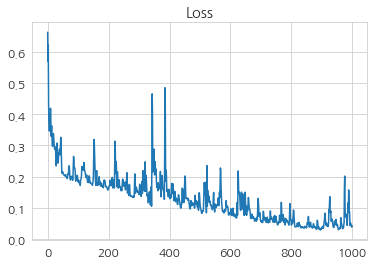

In [23]:
plt.plot(history_RNN.history['loss'])
plt.title("Loss")
plt.show()

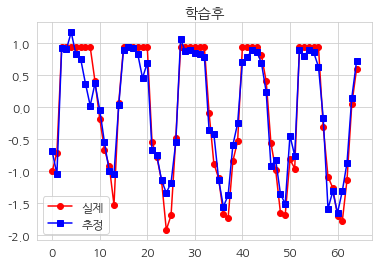

In [25]:
plt.plot(y_train[:], "ro-", label='실제')
plt.plot(model_RNN.predict(X_train[:, :, :]), 'bs-', label="추정")
plt.legend()
plt.title("학습후")
plt.show()

같은 것을 LSTM을 이용해 모델링하면 다음과 같다.

In [26]:
from keras.layers import LSTM

model_LSTM = Sequential()
model_LSTM.add(LSTM(100, input_shape=(ts, 1)))
model_LSTM.add(Dense(1, activation='linear'))
model_LSTM.compile(loss='mse', optimizer='adam')

In [27]:
model_LSTM.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


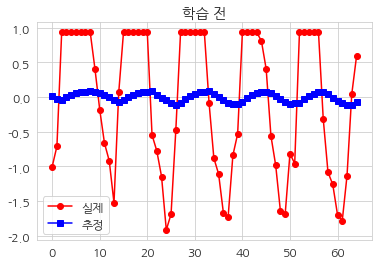

In [28]:
plt.plot(y_train[:], 'ro-', label='실제')
plt.plot(model_LSTM.predict(X_train[:, :, :]), 'bs-', label="추정")
plt.legend()
plt.title("학습 전")
plt.show()

In [29]:
history_LSTM = model_LSTM.fit(X_train, y_train, epochs=1000, verbose=0)

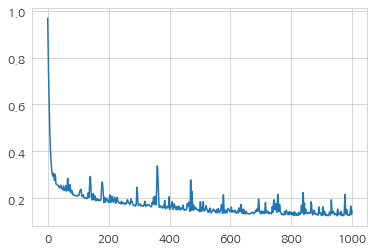

In [30]:
plt.plot(history_LSTM.history['loss'])
plt.show()

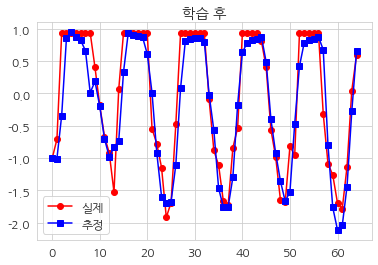

In [31]:
plt.plot(y_train[:], 'ro-', label="실제")
plt.plot(model_LSTM.predict(X_train[:, :, :]), 'bs-', label="추정")
plt.legend()
plt.title('학습 후')
plt.show()

지금까지 설명한 것은 기본적인 LSTM의 구조이다. 실제로는 LSTM을 변형한 것들도 많이 사용된다.

## Bi-directional LSTM

In [32]:
from keras.layers import Bidirectional

In [33]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [34]:
model = Sequential()
model.add(Bidirectional(LSTM(100, input_shape=(ts, 1))))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='RMSProp')

In [35]:
history = model.fit(X_train, y_train, epochs=1000, verbose=0)

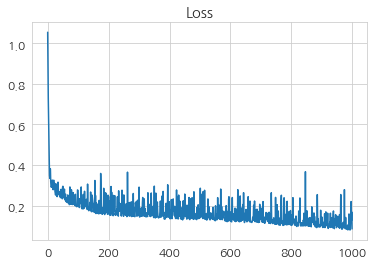

In [36]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.show()

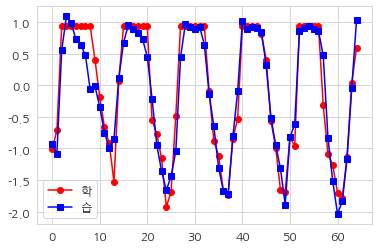

In [37]:
plt.plot(y_train[:], 'ro-', label='실제')
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label='추정')
plt.legend('학습 후')
plt.show()